 <p style="background-color:blue; font-family:newtimeroman; font-size:200%;  color:white; padding: 20px; text-align:center; border-radius:50px 50px;" ><b>Hand Written Digits Project</b></p>

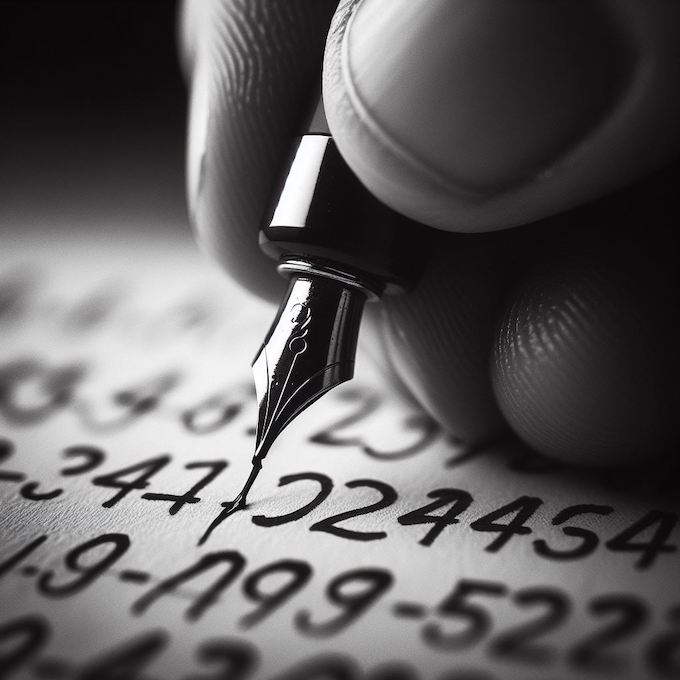

# Hand Written Digits

Data reference link : https://datahub.io/machine-learning/pendigits

The dataset provided at the link contains information on handwritten digits collected from 44 writers. Each digit (0-9) was written multiple times by each writer. Each sample consists of 16 attributes, representing the x and y coordinates for the pen position of the digit.

Here's a brief description of the dataset:

- **Title**: Pen-Based Recognition of Handwritten Digits Data Set

- **Source**: The dataset is sourced from UCI Machine Learning Repository.

- **Description**: The dataset contains 10 classes (digits 0 through 9), with each class represented by samples collected from multiple writers. Each sample consists of 16 features (x and y coordinates for the pen position), which are normalized and centered around the origin. The data was captured using a special digitizer tablet.

This dataset is often used for tasks such as digit recognition, pattern recognition, and machine learning algorithm evaluation. I will use SVM, DT, and RF to classify digits in the dataset.


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [3]:
import plotly
import plotly.express as px
import cufflinks as cf

# Exploratory Data Analysis and Visualization

In [6]:
hand_written = pd.read_csv('pendigits_txt.csv')
df = hand_written.copy()

In [7]:
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [8]:
df.shape

(10992, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [10]:
df.isnull().sum() # No nulls

input1     0
input2     0
input3     0
input4     0
input5     0
input6     0
input7     0
input8     0
input9     0
input10    0
input11    0
input12    0
input13    0
input14    0
input15    0
input16    0
class      0
dtype: int64

In [11]:
df.duplicated().sum() # No dublicates

0

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.000,38.814,34.258,0.000,6.000,32.000,65.000,100.000
input2,10992.000,85.120,16.219,0.000,76.000,89.000,100.000,100.000
input3,10992.000,40.606,26.343,0.000,20.000,40.000,58.000,100.000
input4,10992.000,83.774,19.164,0.000,72.000,91.000,100.000,100.000
input5,10992.000,49.770,34.101,0.000,18.000,53.000,78.000,100.000
input6,10992.000,65.573,26.997,0.000,49.000,71.000,86.000,100.000
input7,10992.000,51.220,30.577,0.000,28.000,53.500,74.000,100.000
input8,10992.000,44.499,29.906,0.000,23.000,43.000,64.000,100.000
input9,10992.000,56.869,34.136,0.000,29.000,60.000,89.000,100.000
input10,10992.000,33.696,27.252,0.000,7.000,33.000,54.000,100.000


In [13]:
df['class'].value_counts().sort_index() #balanced data

class
0    1143
1    1143
2    1144
3    1055
4    1144
5    1055
6    1056
7    1142
8    1055
9    1055
Name: count, dtype: int64

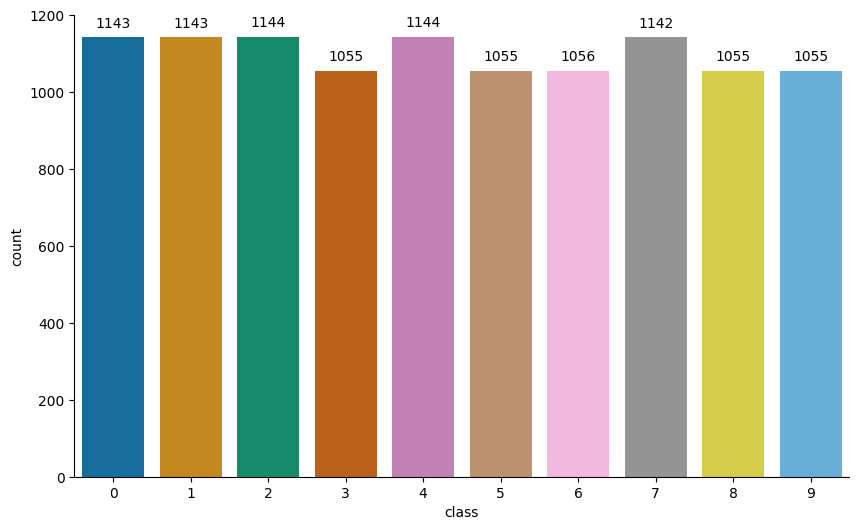

In [15]:
ax = sns.countplot(x = df["class"], palette='colorblind')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show();

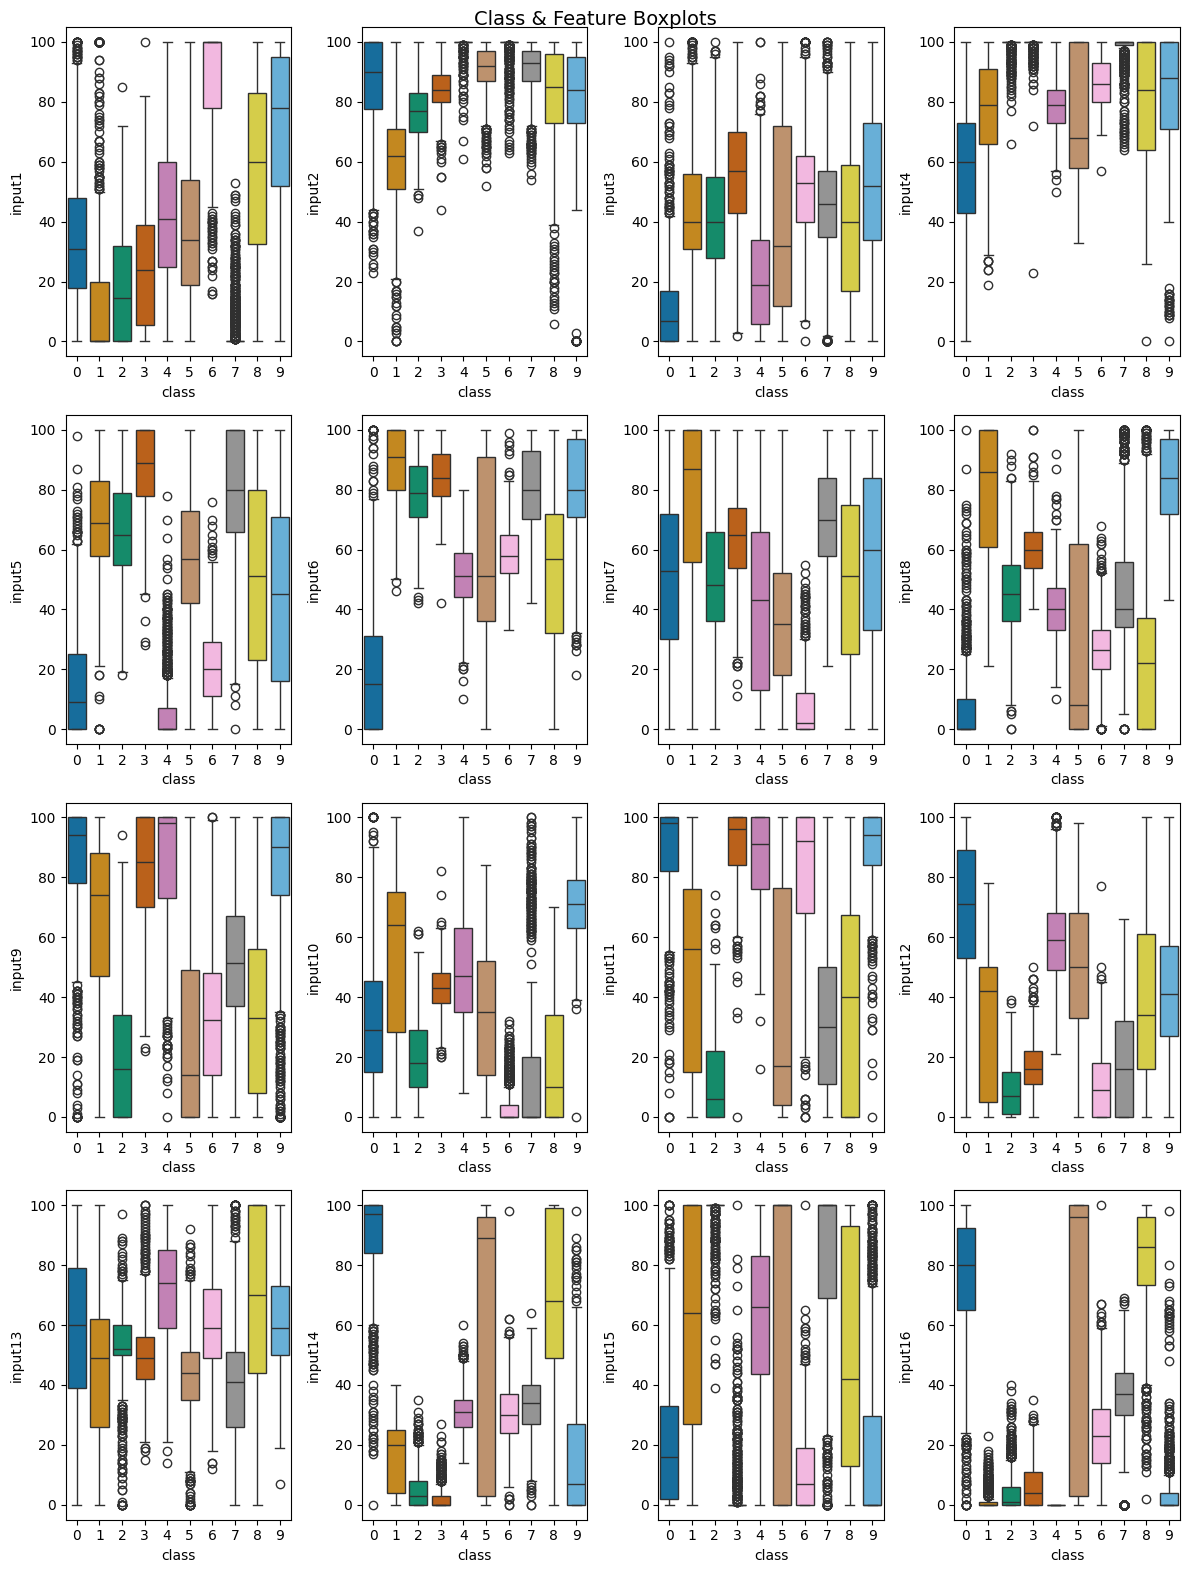

In [18]:
plt.figure(figsize=(12, 16))

# boxplot for each class-feaute pair
for i, col in enumerate(df.drop("class", axis=1).columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x='class',
                y=col,
                data=df,
                hue='class',
                legend=False,
                palette='colorblind')

plt.suptitle('Class & Feature Boxplots', fontsize=14)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation of Features with Class')

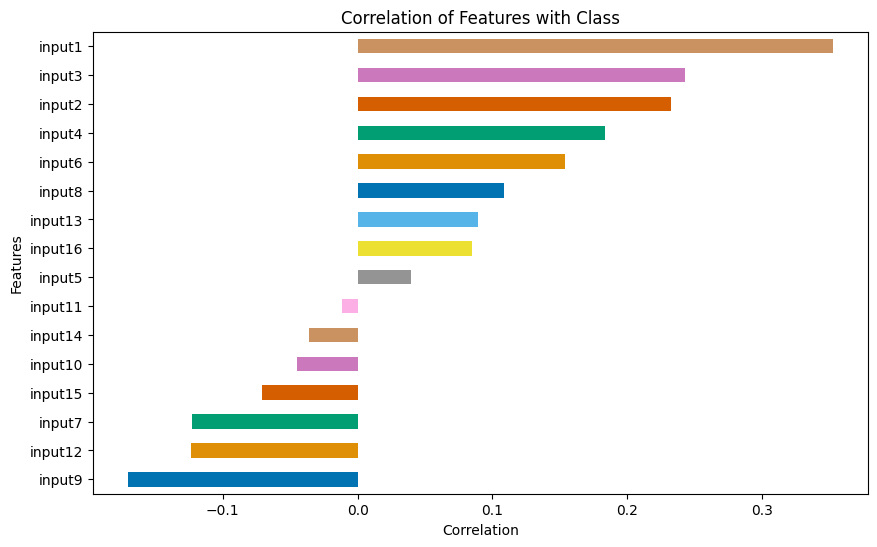

In [22]:
# # Define a color palette
# colors = sns.color_palette("colorblind", len(df.columns) - 1)

# # Plot the bar plot with the specified color palette
# df.corr()["class"].drop("class").sort_values().plot.barh(color=colors)

# plt.xlabel("Correlation")
# plt.ylabel("Features")
# plt.title("Correlation of Features with Class")

# Train | Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop(columns='class')
y = df['class']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.15,
                                                    stratify= y,
                                                    random_state= 101)

# Metrics Used

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [28]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# Support Vector Machine (SVM) Classifier

It is good practise to scale the features for distance based algorithms such as SVM. 

In [29]:
from sklearn.svm import SVC

In [30]:
from sklearn.preprocessing import StandardScaler

## Vanilla model

In [1]:
from sklearn.pipeline import Pipeline

In [31]:
steps = [("scaler", StandardScaler()), ("SVC", SVC(random_state=101))]
SVC_pipe = Pipeline(steps=steps)

In [32]:
SVC_pipe.fit(X_train, y_train)
eval_metric(SVC_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[181   0   0   0   0   0   1   0   0   0]
 [  0 160   0   0   0   0   0   0   0   0]
 [  0   1 178   0   0   0   0   0   0   0]
 [  0   0   0 140   0   0   0   0   0   0]
 [  0   0   0   0 187   0   0   0   0   0]
 [  0   0   0   2   0 159   0   0   0   0]
 [  0   0   0   0   0   0 167   0   0   0]
 [  0   1   0   0   0   0   0 188   0   0]
 [  0   0   0   0   0   0   0   0 144   0]
 [  0   0   0   0   0   0   0   0   0 140]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       182
           1       0.99      1.00      0.99       160
           2       1.00      0.99      1.00       179
           3       0.99      1.00      0.99       140
           4       1.00      1.00      1.00       187
           5       1.00      0.99      0.99       161
           6       0.99      1.00      1.00       167
           7       1.00      0.99      1.00       189
           8       1.00      1.00      1.00       144
           9       

## CV

In [55]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

In [72]:
steps = [('scaler', StandardScaler()), ('SVC', SVC(random_state=101))]
SVC_pipe = Pipeline(steps=steps)

scores = cross_validate(SVC_pipe,
                        X_train,
                        y_train,
                        scoring={
                            "accuracy":"accuracy",
                            "precision":make_scorer(precision_score, average="macro"),
                            "recall":make_scorer(recall_score, average="macro"),
                            "f1":make_scorer(f1_score, average="macro")},
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.995
train_accuracy    0.996
test_precision    0.995
train_precision   0.996
test_recall       0.995
train_recall      0.996
test_f1           0.995
train_f1          0.996
dtype: float64

Also, I will display score metrics for each class. Since, the dataset is balanced and each class has equal importance, I will compare accuracy scores for analysis. 

In [65]:
from sklearn.model_selection import cross_val_predict

In [76]:
# the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=101))
])

# Perform cross-validation on the training set
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10)

# Train the pipeline on the entire training set
pipeline.fit(X_train, y_train)

# Predict labels on the testing set
y_pred = pipeline.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score for each class
accuracy_per_class = accuracy_score(y_test, y_pred)
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    "Class": range(y.nunique()),
    "Train_Accuracy": cv_scores,
    "Test_Accuracy": [accuracy_per_class] * y.nunique(),
    "Test_Precision": precision_per_class,
    "Test_Recall": recall_per_class,
    "Test_F1 Score": f1_per_class
})

# Set the class as the index
metrics_df.set_index("Class", inplace=True)

# Print the cross-validation scores
print("CV train accuracy mean:", cv_scores.mean())
print()

# Print the DataFrame with metrics
print(metrics_df)

Mean cross-validation accuracy: 0.9947552359468217

       Train_Accuracy  Accuracy  Precision  Recall  F1 Score
Class                                                       
0               0.993     0.997      1.000   0.995     0.997
1               0.999     0.997      0.988   1.000     0.994
2               0.995     0.997      1.000   0.994     0.997
3               0.994     0.997      0.986   1.000     0.993
4               0.994     0.997      1.000   1.000     1.000
5               0.993     0.997      1.000   0.988     0.994
6               0.997     0.997      0.994   1.000     0.997
7               0.996     0.997      1.000   0.995     0.997
8               0.998     0.997      1.000   1.000     1.000
9               0.991     0.997      1.000   1.000     1.000


## Grid Search CV

Now, it is time to find best parameters for the algorithm. 

In [79]:
from sklearn.model_selection import GridSearchCV

In [85]:
param_grid = {"SVC__C": [0.001, 0.05, 0.01, 0.1],
             "SVC__gamma":["scale", "auto", 0.1, 0.2],
             "SVC__kernel":["rbf", "linear"]}

In [86]:
steps = [("scaler", StandardScaler()),
         ("SVC",
          SVC(probability=True, random_state=101))]
SVC_pipe = Pipeline(steps=steps)

svm_grid_model = GridSearchCV(SVC_pipe,
                              param_grid,
                              scoring= "accuracy",
                              cv=10,
                              n_jobs= -1)

In [88]:
svm_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=101))]),
             n_jobs=-10,
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__gamma': ['scale', 'auto', 0.1, 0.2],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [89]:
svm_grid_model.best_params_

{'SVC__C': 0.1, 'SVC__gamma': 0.2, 'SVC__kernel': 'rbf'}

In [90]:
svm_grid_model.best_score_

0.9873704038750015

In [151]:
round(svm_grid_model.best_score_, 3)

0.987

In [91]:
eval_metric(svm_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[179   0   0   0   0   0   1   0   2   0]
 [  0 157   1   1   0   0   0   1   0   0]
 [  0   4 175   0   0   0   0   0   0   0]
 [  0   0   0 140   0   0   0   0   0   0]
 [  0   0   0   0 186   1   0   0   0   0]
 [  0   0   0   2   0 157   0   0   2   0]
 [  0   0   0   0   0   0 166   0   1   0]
 [  0   1   0   0   0   0   0 188   0   0]
 [  0   0   0   0   0   0   0   0 144   0]
 [  0   0   0   0   0   0   0   0   0 140]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       182
           1       0.97      0.98      0.98       160
           2       0.99      0.98      0.99       179
           3       0.98      1.00      0.99       140
           4       1.00      0.99      1.00       187
           5       0.99      0.98      0.98       161
           6       0.99      0.99      0.99       167
           7       0.99      0.99      0.99       189
           8       0.97      1.00      0.98       144
           9       

In [92]:
steps = [("scaler", StandardScaler()),
         ("SVC",SVC(C=0.1,
                    gamma=0.2,
                    kernel="rbf",
                    probability=True,
                    random_state=101))]
model = Pipeline(steps=steps)

scores = cross_validate(SVC_pipe,
                        X_train,
                        y_train,
                        scoring={
                            "accuracy":"accuracy",
                            "precision":make_scorer(precision_score, average="macro"),
                            "recall":make_scorer(recall_score, average="macro"),
                            "f1":make_scorer(f1_score, average="macro")},
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.995
train_accuracy    0.996
test_precision    0.995
train_precision   0.996
test_recall       0.995
train_recall      0.996
test_f1           0.995
train_f1          0.996
dtype: float64

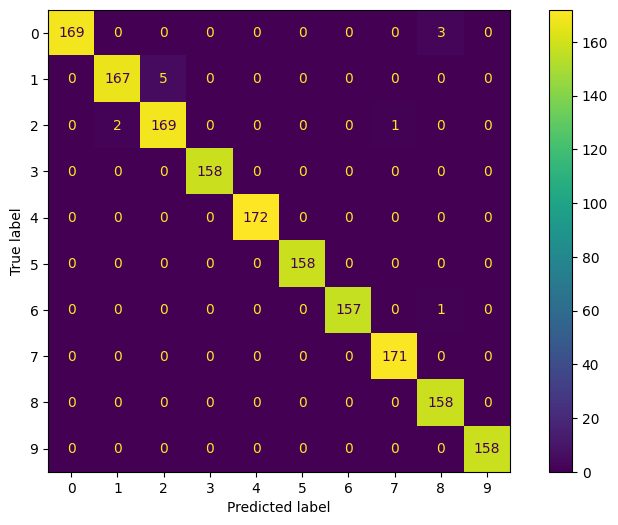

In [108]:
ConfusionMatrixDisplay.from_estimator(svm_grid_model, X_test, y_test)

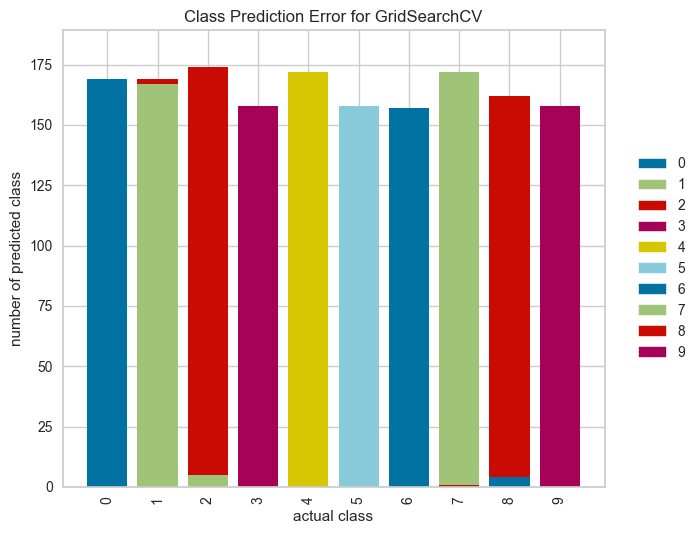

In [110]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(svm_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [ ]:
# !pip install scikit-plot

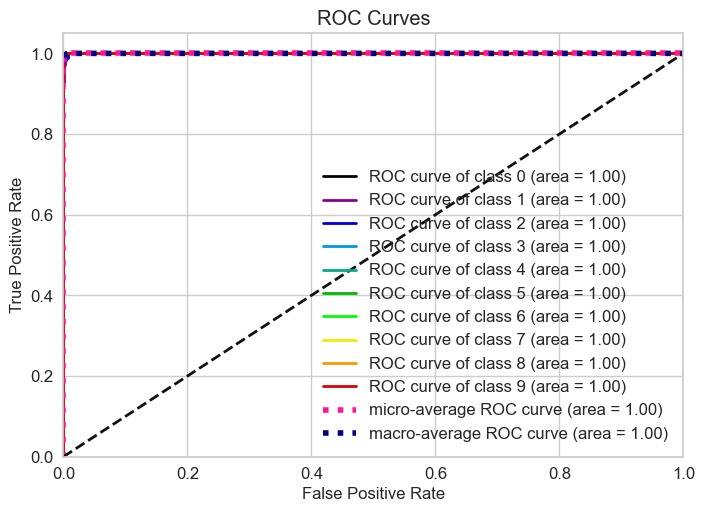

In [133]:
from scikitplot.metrics import plot_roc, plot_precision_recall_curve

y_pred_proba = svm_grid_model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

# Decision Tree (DT) Classifier

I will use the same train & test split sets above. Tree based algorithms have no need for scaling since they are rule based. 

In [102]:
from sklearn.tree import DecisionTreeClassifier

## Vanilla model

In [104]:
DT_pipe = Pipeline(steps=[('DT_model', DecisionTreeClassifier(random_state=101))])

In [105]:
DT_pipe.fit(X_train, y_train)
eval_metric(DT_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[171   0   0   0   0   0   0   0   1   0]
 [  0 157   9   2   0   0   1   1   1   1]
 [  0   7 162   2   0   0   1   0   0   0]
 [  0   1   0 156   0   0   0   0   0   1]
 [  0   0   1   0 169   0   1   0   0   1]
 [  0   0   0   0   0 156   0   1   0   1]
 [  1   0   2   0   0   0 154   0   1   0]
 [  0   1   1   0   0   0   0 162   3   4]
 [  0   0   0   1   0   0   1   1 155   0]
 [  0   0   0   1   0   3   0   0   0 154]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       172
           1       0.95      0.91      0.93       172
           2       0.93      0.94      0.93       172
           3       0.96      0.99      0.97       158
           4       1.00      0.98      0.99       172
           5       0.98      0.99      0.98       158
           6       0.97      0.97      0.97       158
           7       0.98      0.95      0.96       171
           8       0.96      0.98      0.97       158
           9       

## CV

In [111]:
DT_pipe = Pipeline(steps=[('DT_model', DecisionTreeClassifier(random_state=101))])

scores = cross_validate(DT_pipe,
                        X_train,
                        y_train,
                        scoring={
                            "accuracy":"accuracy",
                            "precision":make_scorer(precision_score, average="macro"),
                            "recall":make_scorer(recall_score, average="macro"),
                            "f1":make_scorer(f1_score, average="macro")},
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.961
train_accuracy    1.000
test_precision    0.961
train_precision   1.000
test_recall       0.961
train_recall      1.000
test_f1           0.961
train_f1          1.000
dtype: float64

In [112]:

# Perform cross-validation on the training set
cv_scores = cross_val_score(DT_pipe, X_train, y_train, cv=10)

# Train the pipeline on the entire training set
DT_pipe.fit(X_train, y_train)

# Predict labels on the testing set
y_pred = DT_pipe.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score for each class
accuracy_per_class = accuracy_score(y_test, y_pred)
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    "Class": range(y.nunique()),
    "Train_Accuracy": cv_scores,
    "Test_Accuracy": [accuracy_per_class] * y.nunique(),
    "Test_Precision": precision_per_class,
    "Test_Recall": recall_per_class,
    "Test_F1 Score": f1_per_class
})

# Set the class as the index
metrics_df.set_index("Class", inplace=True)

# Print the cross-validation scores
print("CV train accuracy mean:", cv_scores.mean())
print()

# Print the DataFrame with metrics
print(metrics_df)

CV train accuracy mean: 0.9607174020084968

       Train_Accuracy  Test_Accuracy  Test_Precision  Test_Recall  \
Class                                                               
0               0.964          0.968           0.994        0.994   
1               0.963          0.968           0.946        0.913   
2               0.973          0.968           0.926        0.942   
3               0.955          0.968           0.963        0.987   
4               0.959          0.968           1.000        0.983   
5               0.956          0.968           0.981        0.987   
6               0.963          0.968           0.975        0.975   
7               0.966          0.968           0.982        0.947   
8               0.956          0.968           0.963        0.981   
9               0.953          0.968           0.951        0.975   

       Test_F1 Score  
Class                 
0              0.994  
1              0.929  
2              0.934  
3           

## Grid Search CV

In [ ]:
# from sklearn.model_selection import GridSearchCV

In [114]:
DT_pipe = Pipeline(steps=[('DT_model', DecisionTreeClassifier(random_state=101))])

In [113]:
param_grid = {"DT_model__splitter":["best", "random"],
              "DT_model__max_features":[None, "auto", "log2", 2, 3, 4, 5, 6, 7],
              "DT_model__max_depth": [None, 2, 3, 4],
              "DT_model__min_samples_leaf": [1, 2, 3, 4, 5, 6, 7],
              "DT_model__min_samples_split": [2, 3, 5, 6, 7, 8, 9]}

In [115]:
dt_grid_model = GridSearchCV(estimator= DT_pipe,
                             param_grid= param_grid,
                             scoring= 'accuracy',
                             cv= 10,
                             n_jobs= -1,
                             return_train_score= True)

In [116]:
dt_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('DT_model',
                                        DecisionTreeClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'DT_model__max_depth': [None, 2, 3, 4],
                         'DT_model__max_features': [None, 'auto', 'log2', 2, 3,
                                                    4, 5, 6, 7],
                         'DT_model__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'DT_model__min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'DT_model__splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy')

In [117]:
dt_grid_model.best_params_

{'DT_model__max_depth': None,
 'DT_model__max_features': None,
 'DT_model__min_samples_leaf': 1,
 'DT_model__min_samples_split': 2,
 'DT_model__splitter': 'best'}

In [118]:
dt_grid_model.best_score_

0.9607174020084968

In [119]:
eval_metric(dt_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[171   0   0   0   0   0   0   0   1   0]
 [  0 157   9   2   0   0   1   1   1   1]
 [  0   7 162   2   0   0   1   0   0   0]
 [  0   1   0 156   0   0   0   0   0   1]
 [  0   0   1   0 169   0   1   0   0   1]
 [  0   0   0   0   0 156   0   1   0   1]
 [  1   0   2   0   0   0 154   0   1   0]
 [  0   1   1   0   0   0   0 162   3   4]
 [  0   0   0   1   0   0   1   1 155   0]
 [  0   0   0   1   0   3   0   0   0 154]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       172
           1       0.95      0.91      0.93       172
           2       0.93      0.94      0.93       172
           3       0.96      0.99      0.97       158
           4       1.00      0.98      0.99       172
           5       0.98      0.99      0.98       158
           6       0.97      0.97      0.97       158
           7       0.98      0.95      0.96       171
           8       0.96      0.98      0.97       158
           9       

In [121]:
operations = [("DT_model", DecisionTreeClassifier(max_depth=None,
                                                  max_features= None,
                                                  min_samples_split= 2,
                                                  min_samples_leaf= 1,
                                                  splitter = 'best',
                                                  random_state=101))]

scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.961
train_accuracy          1.000
test_precision_micro    0.961
train_precision_micro   1.000
test_recall_micro       0.961
train_recall_micro      1.000
test_f1_micro           0.961
train_f1_micro          1.000
dtype: float64

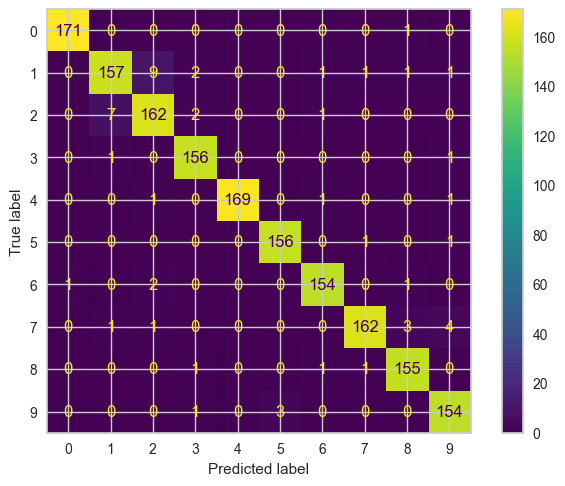

In [123]:
ConfusionMatrixDisplay.from_estimator(dt_grid_model, X_test, y_test)

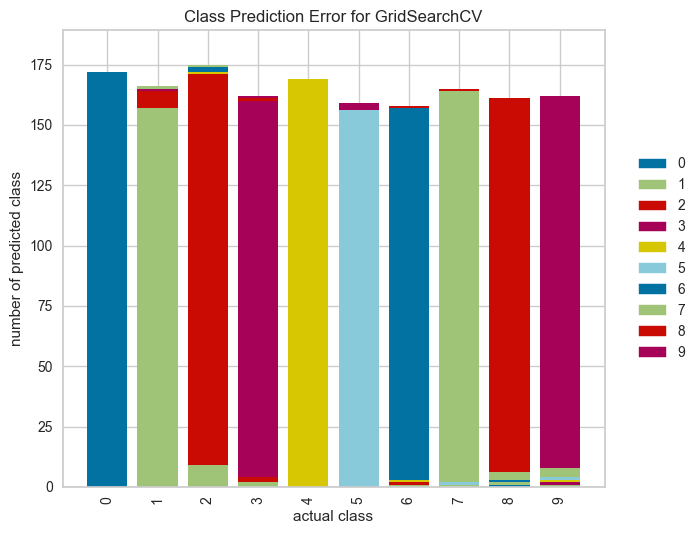

In [124]:
# from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(dt_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();


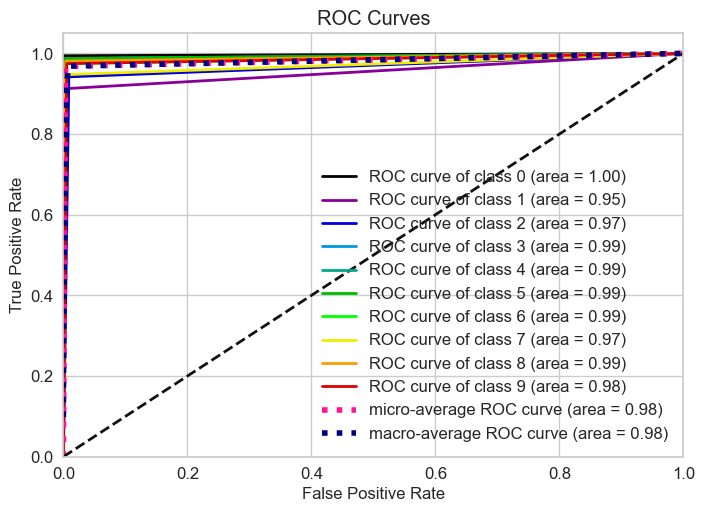

In [134]:
# from scikitplot.metrics import plot_roc, plot_precision_recall_curve

y_pred_proba = dt_grid_model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

# Random Forest Classifier

In [125]:
from sklearn.ensemble import RandomForestClassifier

## Vanilla model

In [126]:
RF_pipe = Pipeline(steps=[('RF_model', RandomForestClassifier(random_state=101))])

In [127]:
RF_pipe.fit(X_train, y_train)
eval_metric(RF_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[170   0   0   0   0   0   0   0   2   0]
 [  0 165   7   0   0   0   0   0   0   0]
 [  0   2 170   0   0   0   0   0   0   0]
 [  0   1   0 157   0   0   0   0   0   0]
 [  0   0   0   0 172   0   0   0   0   0]
 [  0   0   0   0   0 158   0   0   0   0]
 [  0   0   0   0   0   0 158   0   0   0]
 [  0   0   1   0   0   0   0 169   0   1]
 [  0   0   0   0   0   0   0   0 158   0]
 [  0   0   0   0   0   0   0   0   0 158]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       172
           1       0.98      0.96      0.97       172
           2       0.96      0.99      0.97       172
           3       1.00      0.99      1.00       158
           4       1.00      1.00      1.00       172
           5       1.00      1.00      1.00       158
           6       1.00      1.00      1.00       158
           7       1.00      0.99      0.99       171
           8       0.99      1.00      0.99       158
           9       

## CV

In [128]:
scores = cross_validate(RF_pipe,
                        X_train,
                        y_train,
                        scoring={
                            "accuracy":"accuracy",
                            "precision":make_scorer(precision_score, average="macro"),
                            "recall":make_scorer(recall_score, average="macro"),
                            "f1":make_scorer(f1_score, average="macro")},
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.991
train_accuracy    1.000
test_precision    0.991
train_precision   1.000
test_recall       0.991
train_recall      1.000
test_f1           0.991
train_f1          1.000
dtype: float64

In [135]:
# Perform cross-validation on the training set
cv_scores = cross_val_score(RF_pipe, X_train, y_train, cv=10)

# Train the pipeline on the entire training set
RF_pipe.fit(X_train, y_train)

# Predict labels on the testing set
y_pred = RF_pipe.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score for each class
accuracy_per_class = accuracy_score(y_test, y_pred)
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    "Class": range(y.nunique()),
    "Train_Accuracy": cv_scores,
    "Test_Accuracy": [accuracy_per_class] * y.nunique(),
    "Test_Precision": precision_per_class,
    "Test_Recall": recall_per_class,
    "Test_F1 Score": f1_per_class
})

# Set the class as the index
metrics_df.set_index("Class", inplace=True)

# Print the cross-validation scores
print("CV train accuracy mean:", cv_scores.mean())
print()

# Print the DataFrame with metrics
print(metrics_df)

CV train accuracy mean: 0.9911162385919912

       Train_Accuracy  Test_Accuracy  Test_Precision  Test_Recall  \
Class                                                               
0               0.988          0.992           1.000        0.988   
1               0.989          0.992           0.982        0.959   
2               0.997          0.992           0.955        0.988   
3               0.990          0.992           1.000        0.994   
4               0.989          0.992           1.000        1.000   
5               0.988          0.992           1.000        1.000   
6               0.991          0.992           1.000        1.000   
7               0.991          0.992           1.000        0.988   
8               0.991          0.992           0.988        1.000   
9               0.995          0.992           0.994        1.000   

       Test_F1 Score  
Class                 
0              0.994  
1              0.971  
2              0.971  
3           

## Grid Search CV

In [136]:
RF_pipe = Pipeline(steps=[('RF_model', RandomForestClassifier(random_state=101))])

In [140]:
param_grid = {'RF_model__n_estimators':[64, 128, 200],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.8, 1]}

In [141]:
rf_grid_model = GridSearchCV(estimator= RF_pipe,
                             param_grid= param_grid,
                             scoring= 'accuracy',
                             cv= 10,
                             n_jobs= -1,
                             return_train_score= True)

In [142]:
rf_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('RF_model',
                                        RandomForestClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__max_samples': [0.8, 1],
                         'RF_model__min_samples_leaf': [2, 3, 4],
                         'RF_model__min_samples_split': [2, 3, 4],
                         'RF_model__n_estimators': [64, 128, 200]},
             return_train_score=True, scoring='accuracy')

In [143]:
rf_grid_model.best_params_

{'RF_model__max_depth': 4,
 'RF_model__max_features': 4,
 'RF_model__max_samples': 0.8,
 'RF_model__min_samples_leaf': 2,
 'RF_model__min_samples_split': 2,
 'RF_model__n_estimators': 128}

In [144]:
rf_grid_model.best_score_

0.8794803558955214

In [145]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[161   0   1   0   0   0   2   0   8   0]
 [  0 120  44   5   1   0   1   0   0   1]
 [  0   5 167   0   0   0   0   0   0   0]
 [  0   0   0 158   0   0   0   0   0   0]
 [  0   0   0   0 170   0   0   0   0   2]
 [  0   0   1  35   0  96   2   0   2  22]
 [  0   0   0   0   2   0 151   5   0   0]
 [  0  12   0   0   1   1   0 150   0   7]
 [  1   3   0   2   0   0   0   7 141   4]
 [  2  16   0   6   1   1   0   0   2 130]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       172
           1       0.77      0.70      0.73       172
           2       0.78      0.97      0.87       172
           3       0.77      1.00      0.87       158
           4       0.97      0.99      0.98       172
           5       0.98      0.61      0.75       158
           6       0.97      0.96      0.96       158
           7       0.93      0.88      0.90       171
           8       0.92      0.89      0.91       158
           9       

In [147]:
operations = [("RF_model", RandomForestClassifier(max_depth= 4, 
                                                  max_features= 4,
                                                  max_samples= 0.8,
                                                  min_samples_split= 2,
                                                  min_samples_leaf= 2,
                                                  n_estimators= 128,
                                                  random_state=101))]

scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.879
train_accuracy          0.883
test_precision_micro    0.879
train_precision_micro   0.883
test_recall_micro       0.879
train_recall_micro      0.883
test_f1_micro           0.879
train_f1_micro          0.883
dtype: float64

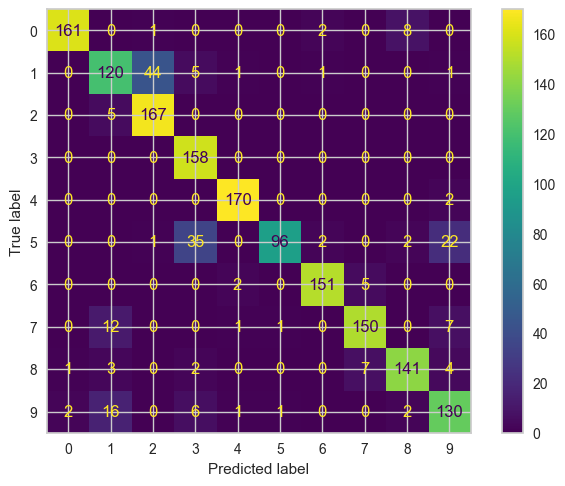

In [148]:
ConfusionMatrixDisplay.from_estimator(rf_grid_model, X_test, y_test)

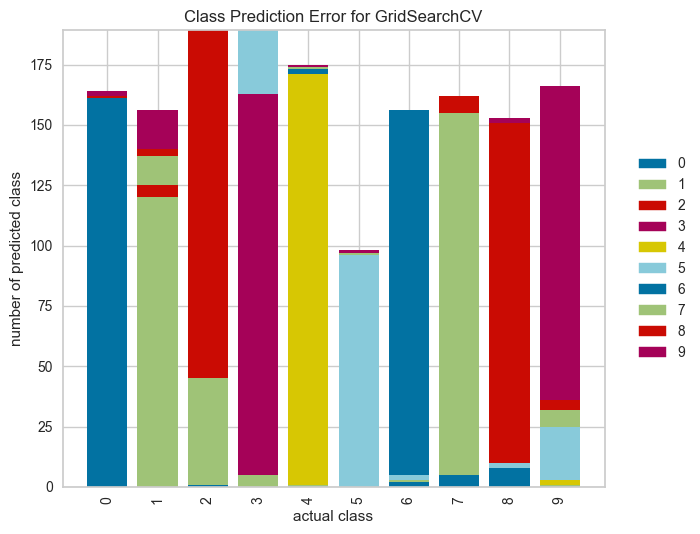

In [149]:
# from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rf_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();


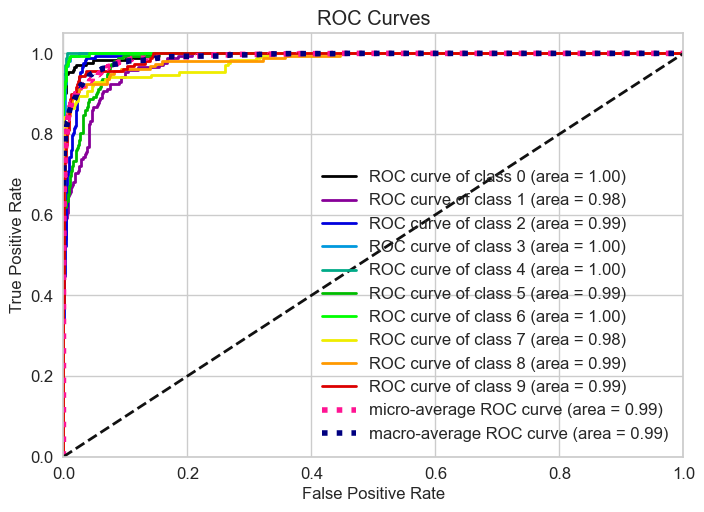

In [150]:
# from scikitplot.metrics import plot_roc, plot_precision_recall_curve

y_pred_proba = rf_grid_model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

# Choose the Best Model

Based on the grid search results, SVM classifier gives the best accuracy result.